# Is Fandango Still Inflating Ratings?



## Introduction
**Context**: In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator).
<br>
Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page.

**Goal**:In this project, I'm going to analyse analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data
One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, there are ready-made data for both these periods of time:
1. Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). I'm going to use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

2. One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and I'm going to use it to analyze the rating system's characteristics after Hickey's analysis.



Start by importing the necessary libraries.

In [1]:
# import the necessary modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Read in both of the datasets. 
<br>
Print the first five rows of the datasets.

In [2]:
# read in and explore the datasets
# only read in the cols that will be useful to our analysis
fandango_score_comparison = pd.read_csv('/Users/sumersener/Downloads/Datasets/fandango_score_comparison.csv', usecols = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'])
print((fandango_score_comparison.head()))
print()
movie_ratings_16_17 = pd.read_csv('/Users/sumersener/Downloads/Datasets/movie_ratings_16_17.csv', usecols = ['movie', 'year', 'fandango'])
print((movie_ratings_16_17.head()))

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  

                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0


## Changing the Goal of our Analysis
By reading the README.md files of the two repositories we can learn that the sampling is not random. In fact, only popular movies were considered in Hickey's analysis. Therefore, we'll update our goal in the project slightly before moving forward. We'll only analyse the popular movies in both of the datasets. 

The population of interest changes and the samples we currently work with become representative.
The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.


## Isolating the Samples We Need


With the new goal, we now have two populations that we want to describe and compare with each other:

All Fandango's ratings for popular movies released in 2015.
All Fandango's ratings for popular movies released in 2016.
The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

Check if both samples contain popular movies — that is, check whether all (or at least most) sample points are movies with over 30 fan ratings on Fandango's website.

One of the data sets doesn't provide information about the number of fan ratings, and this raises representativity issues once again.

Check the number of *popular* movies in the first dataset.

In [3]:
# check how many movies are 'popular' in the first data set
fandango_score_comparison[fandango_score_comparison['Fandango_votes'] >30].shape

(146, 5)

The old data set conatains 146 movies with more than 30 votes. According to our definition of popularity, these movies are popular. Hence we have a good number of popular movies to work with.
<br>
We don't know if the new data set also contains popular values or not. One way to check this is to sample 10 random movies from the new data set and check manually that these the majority of these moves are 'popular', ie. they have a more than 30 fan ratings. 

In the next cell, sample 10 random movies from the new dataset and check if they are popular according to our definition of popularity.

In [4]:
# sample 10 movies
movie_ratings_16_17.sample(10, random_state =1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [5]:
# manually create a dictionary of where keys are the movies in the above sample and 
# the values are the number of ratings they have on Fandango as of 26 November 2023
mydict = dict()
mydict['Mechanic: Resurrection'] = 25728 
mydict['Warcraft'] = 32131
mydict['Max Steel'] = 6937
mydict['Me Before You'] = 31060 
mydict['Fantastic Beasts and Where to Find Them'] =  4848 
mydict['Cell'] = 3932 
mydict['Genius'] = 683
mydict['Sully'] = 48957
mydict['A Hologram for the King'] = 10291
mydict['Captain America: Civil War'] = 187032 

mydict


{'Mechanic: Resurrection': 25728,
 'Warcraft': 32131,
 'Max Steel': 6937,
 'Me Before You': 31060,
 'Fantastic Beasts and Where to Find Them': 4848,
 'Cell': 3932,
 'Genius': 683,
 'Sully': 48957,
 'A Hologram for the King': 10291,
 'Captain America: Civil War': 187032}

As seen above, all of the movies in our sample are popular. Hence, we can assume that the second data set also contains data about popular movies.

**Note**: it is worth noting that using the number of ratings from 2023 is probably not the best practice since our original data is from the years 2015-2017. However, becuaes we can't obtain the ratings from the years these data were collected, we will carry on with our analysis and hope that the ratings from 2023 are good enough for our purposes.

### Isolating the Years We Need
Notice that both data sets include years that are not 2015 or 2016. However, for our analysis we only need the data from 2015 and 2016. Hence, in this section we will isolate the data we need. <br>

**Naming Convention**: from this point onwards I will be referring to Hickey's data set as the previous/old data set and the other data set as the after/new data set. 

Notice that the previous data set doesn't have a dedicated column for the year the movie was released. However, we can extract this information from the string in the `FILM` column. Notice tha the old data set doesn't have any data for movies released after 2015, hence, we wil only isolate the movies released in the year 2015 for the old data set. Likewise, we will only isolate the movies released in 2016 from the new data set.

Start by renaming the datasets for better clarity.

In [6]:
# rename the datasets
fandango_prev = fandango_score_comparison
fandango_after = movie_ratings_16_17

Create a new column `Year` in the old datasets, which includes the year that the movie was released.

In [7]:
# split the data sets based on the years
fandango_prev['Year'] = fandango_prev['FILM'].str.extract(r'(\d{4})', expand = False).astype(int) # the code in the extract function is used to extract a 4 digit number
fandango_prev.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


Use the new `Year` column we have created to extract the movies from the year 2015.

In [8]:
# extract the movies released in 2015 from the old data set and print the first 5 rows
prev_2015 = fandango_prev[fandango_prev['Year'] == 2015]
prev_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


Next, we need to isolate the movies from 2016 using the new dataset. Inspect the first five rows of the dataset to check that the data selection has been successful.

In [9]:
# isolate the movies released in 2016 and print the first 5 rows
new_2016 = fandango_after[fandango_after['year'] ==2016]
new_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Comparing Distribution Shapes for 2015 and 2016
In this section I will use kernel density plots to compare the distribution of the movie ratins in 2015 and 2016.

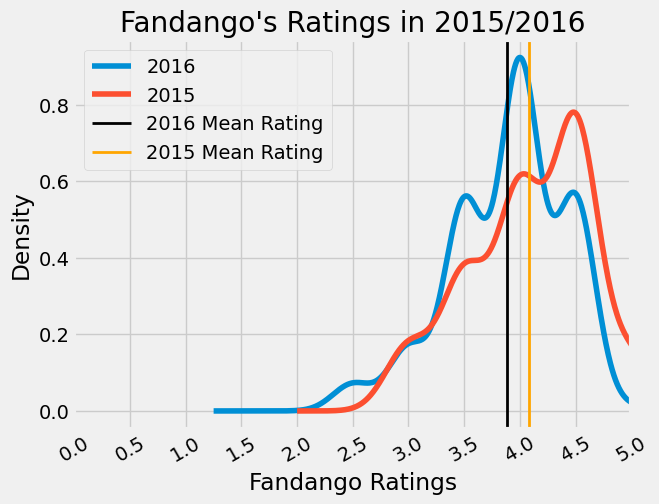

In [10]:
plt.style.use('fivethirtyeight')
new_2016['fandango'].plot.kde(label = '2016')
prev_2015['Fandango_Stars'].plot.kde(label = '2015')
plt.xlabel('Fandango Ratings')
plt.title('Fandango\'s Ratings in 2015/2016')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], rotation = 30)
plt.xlim(0,5)
plt.axvline(new_2016['fandango'].mean(), label = '2016 Mean Rating', color = 'black', linewidth = 2)
plt.axvline(prev_2015['Fandango_Stars'].mean(), label='2015 Mean Rating', color = 'orange', linewidth = 2)
plt.legend(loc= 'upper left')
plt.show()

**Comments on the graphs**: based on the graphs above we can make the following comments:
1. the mode is the highest point of a graph, hence we can see that the mode of the ratings has been shifted to the left, indicating it has decreased. 
2. both of the graphs are left skewed. Hence the popular movies in both years were rated highly.
3. the mean was lower in 2016 indicating that after Fandango fixed the bug in their algorithm the average movie rating among the popular movies went down. 
4. 2016 graph seems to be somewhat symmetric about x =4.0, however, a similar pattern can't be observed in the graph of 2015 ratings.

Hence, it is safe to say that there is evidence that the movie ratings on Fandango seem to have decreased. Given that Fandango sells tickets as well, it seems dubious that both of the graphs are so negatively skewed.

## Comparing Relative Frequencies
The kernel density plots from the previous screen showed that there's a clear difference between the two distributions. They also provided us with information about the direction of the difference: movies in 2016 were rated slightly lower than those in 2015.

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

Because the old and the new data sets hav different number of movies in them, it doesn't make sense to compare the absolute frequencies of the ratins in them. We would rather compare the percentages of the ratings found in the data sets.

Start by computing the percentages of the ratings in the old dataset.

In [11]:
# compute the percentages of ratings
freq_old = prev_2015['Fandango_Stars'].value_counts( normalize = True).sort_index()*100


Print and examine the percentages of ratings in the old dataset.

In [12]:
# print the percentages
print('2015' + '\n' + 20*'-')
freq_old

2015
--------------------


Fandango_Stars
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: proportion, dtype: float64

Next, compute the percentages of the ratings in the new dataset.

In [13]:
# compute the percentages in the new dataset
freq_new = new_2016['fandango'].value_counts(normalize = True).sort_index()*100

Print and inspect the percentages of ratings in the new dataset.

In [14]:
# print the percentages
print('2016' + '\n' + 20*'-')
freq_new 

2016
--------------------


fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64

**Comments on relative frequencies**: the difference between the two years is not extremely clear at first sight. However, we can see that in 2016 the percentage of 5 star raings is an extremely smal 5% whereas in 2015 this percentage was 7%. 

Moreover, a similar decrease can also be seen in the percentage of the 4.5 star ratings. Interestingly, the percantage of 3.5 and 4 star ratings increased significantly between 2015 and 2016.

This challenges our comments from the previous section that the direction of change was negative. In the next section we will be analysing the results more in depth to find out the direction of change.

## Determining the Direction of the Change
We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

We'll take a couple of summary statistics to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

We will compute the mean, median, and mode for each distribution. We will then compare these metrics and determine what they tell about the direction of change between 2015 and 2016. 

We will generate a grouped bar plot to show comparatively how the mean, median, and mode varied for 2015 and 2016.

Start by computing the statistics for the ratings in the old and new datasets.

In [15]:
# compute mean, median, and mode
old_mean = prev_2015['Fandango_Stars'].mean()
old_median = prev_2015['Fandango_Stars'].median()
old_mode = float(prev_2015['Fandango_Stars'].mode())

new_mean = new_2016['fandango'].mean()
new_median = new_2016['fandango'].median()
new_mode = new_2016['fandango'].mode()[0]

Next, create a dataframe of the stats and display the table.

In [16]:
# create a dataframe of the stats
df = pd.DataFrame(index =['mean','median','mode'] )
df['2015'] = [old_mean, old_median, old_mode]
df['2016'] = [new_mean, new_median, new_mode]
df


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


Plot bar charts of the statistics, stratified by the year. 

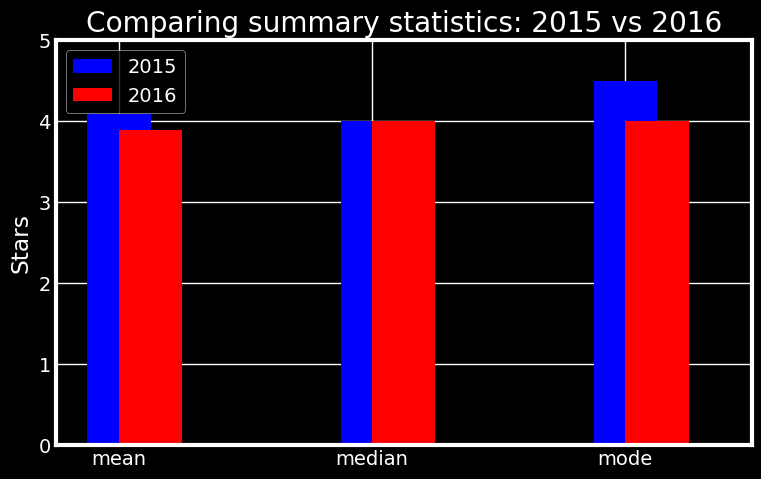

In [17]:
# plot the stats
plt.style.use('dark_background') # set the style
df['2015'].plot.bar(color = 'blue', align = 'center', label = '2015', width = .25)
df['2016'].plot.bar(color = 'red', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylabel('Stars')
plt.ylim(0,5)
plt.legend(loc = 'upper left')
plt.show()

**Comments**: looking at the bar plots above, we can see that median has stayed about the same. However, there is a perceptible reduction in the mode and the mean. Hence we conclude tha the direction of change is negative between 2015 and 2016.

## Conclusion
**Summary**: in this project we analysed two data sets relating to the movie ratings found on Fandango before and after they were accused with inflating their ratings. We focused on the years 2015 and 2016 and analysed the data for only the popular movies. 
<br>
Initially, we spent some time cleaning and understanding the data. Then we compared the distribution of the ratings in 2015 and 2016 with the help of a kernel density plot. In the last two sections of the project we made use of statistcal concepts such as the mean, median and mode to determine the direction of change. At the end we visualised our statistical finding by plotting a grouped bar plot.

**Findings**: we've found that the ratings have decreased between 2015 and 2016. However, we saw that in 2016 the kernel density plot of ratings was still quite a bit negatively skewed. This seems suspicious as Fandango is selling tickets as well. 

**Suggestions for further work**: rather than restricting ourselves to only data from the Fandango website, we could compare the ratings with data from other reputable sites such as IMDb. However, this would be quite difficult because obtaining data from the 2016 version of the IMDb site is quasi-impossible now, hence, we would have to find a data set that could be compared to the data sets we have.